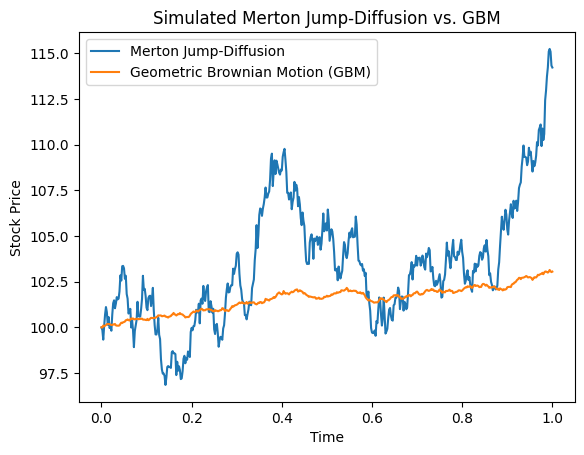

In [64]:
import numpy as np
import matplotlib.pyplot as plt

def merton_jump_diffusion(T, mu, sigma, lambda_, jump_mu, jump_sigma, num_steps, seed=None):
    if seed is not None:
        np.random.seed(seed)

    dt = T / num_steps
    t_values = np.linspace(0, T, num_steps + 1)
    
    # Simulate the Merton Jump-Diffusion process
    dW = np.sqrt(dt) * np.random.randn(num_steps)
    
    # Simulate the jump process
    N_t = np.random.poisson(lambda_ * T, size=num_steps)
    J_t = np.sum(np.random.normal(jump_mu - 0.5 * jump_sigma**2, jump_sigma, (num_steps, np.max(N_t))), axis=1)
    
    # Simulate the geometric Brownian motion with jumps
    S_t = np.zeros(num_steps + 1)
    S_t[0] = 100  # Initial stock price
    
    for i in range(1, num_steps + 1):
        S_t[i] = S_t[i - 1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * dW[i - 1] + J_t[i - 1])

    return t_values, S_t

# Simulation parameters
T = 1.0          # Total time
mu = 0.01        # Drift
sigma = 0.01     # Volatility
lambda_ = 0.001  # Jump intensity (reduced frequency)
jump_mu = 0.0001  # Mean jump size (increased for visibility)
jump_sigma = 0.005 # Jump size volatility
num_steps = 500  # Number of time steps
seed = 109       # Set seed for reproducibility

# Simulate the Merton Jump-Diffusion process with seed
t_values, S_t_jump = merton_jump_diffusion(T, mu, sigma, lambda_, jump_mu, jump_sigma, num_steps, seed=seed)

# Use the same randomness for GBM without jumps
np.random.seed(seed)
dW_gbm = np.sqrt(T / num_steps) * np.random.randn(num_steps)
S_t_gbm = np.zeros(num_steps + 1)
S_t_gbm[0] = 100  # Initial stock price
for i in range(1, num_steps + 1):
    S_t_gbm[i] = S_t_gbm[i - 1] * np.exp((mu - 0.5 * sigma**2) * (T / num_steps) + sigma * dW_gbm[i - 1])

# Plot the simulated stock price processes
plt.plot(t_values, S_t_jump, label='Merton Jump-Diffusion')
plt.plot(t_values, S_t_gbm, label='Geometric Brownian Motion (GBM)')
plt.title('Simulated Merton Jump-Diffusion vs. GBM')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
